In [ ]:
#Install the necessary packages that are not installed by default in Colab

!pip install yfinance #Download financial data
!pip install matplotlib==3.5.3 #Plotting (the default version of Colab is a previous version and misses some great functionality)

# Import standard libraries

These are the most common libraries to load in basically any project dealing with financial data

* **NumPy** - A fundamental package for scientific computing in Python, provides a multidimensional array object and several routines for fast operations on them. Read the [documentation](https://numpy.org/doc/stable/) for more information.

*  **Pandas** -  Another fundamental library providing high-performance, easy-to-use data structures and data analysis tools for Python. Is almost a must for any Python program dealing with data. Read the [documentation](https://pandas.pydata.org/docs/) for more information.

* **Yfinance** - Offers a threaded and Pythonic way to download market data from Yahoo! finance. Read the [documentation](https://pypi.org/project/yfinance/) for more information.

* **Matplotlib** - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Read the [documentation](https://matplotlib.org/stable/users/index) for more information.



In [2]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime, timedelta

#Finance packages
import yfinance as yf

#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Settings for nice figures
from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

# Downloading financial data

We can use the yfinance package to download data from yahoo finance (https://es.finance.yahoo.com/). We have to select the start and end dates to define the period in which we want to obtain the data as well as the asset (or assets) we want to track.

In [3]:
########## DO NOT CHANGE THESE PARAMETERS ##########

start = datetime(2013, 1, 1) #We can use datetime format
end = '2014-01-01' # Also works in string format

interval = "1d" #Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. Default is 1 day

assets = ["TSLA"] #Multiple assets can be also downloaded by using list format: ["AAPL", "MSFT", "AMZN",  "TSLA", "GOOGL",  "GOOG", "UNH", "NVDA", "JNJ", "META"]

###################################################

df = yf.download(assets, start=start, end=end, interval=interval, progress=True)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...
2013-12-24,10.000000,10.331333,9.988000,10.094000,10.094000,149122500
2013-12-26,10.336000,10.533333,10.286000,10.366667,10.366667,106942500
2013-12-27,10.353333,10.366667,10.053333,10.074667,10.074667,81903000


As you can observe, the resulting dataframe contains the **Open**, **High** (or max), **Low** (or min), **Close** and **Adjusted Close** values of the asset at different times and the traded **Volume**.

* **Open:** Cash value of the first transacted price after the market opens.

* **High** Maximum cash value of the transactions occured between the opening and closing of the market.

* **Low:** Minimum cash value of the transactions occurred between the opening and closing of the market.

* **Close:** Cash value of the last transacted price before the market closes.

* **Adjusted Close:** Close price accounting for corporate actions that might change its value, like stock splitts or dividents.

  *Example: a company's board of directors may decide to split the company's stock 3-for-1. Therefore, the company's shares outstanding increase by a multiple of three, while its share price is divided by three. Suppose a stock closed at \$300 the day before its stock split. In this case, the closing price is adjusted to \$100 (\$300 divided by 3) per share to maintain a consistent standard of comparison.*

* **Volume:** Number of transactions processed between the opening and closing of the market.

## Question 1

Note that we have selected a period of time of 1 year, in daily resolution, but only **252** values have been downloaded. Why is that?

Because the stock market is open for 252 days a year.

# Metrics for investment gains, risk and performance

As you have seen in the lectures, different variables associated to price changes can be defined, allowing to measure investment **gains**. Being Y(t) the price of an asset at a given time t, we define the followin variables

*   Price Change

    \begin{equation}
      Z_D(t) \equiv Y(t+\Delta t) - Y(t)
    \end{equation}

*   Discounted Price Change

    \begin{equation}
      Z_D(t) \equiv [Y(t+\Delta t) - Y(t)]D(t)
    \end{equation}
    
*   Return

    \begin{equation}
      R(t) \equiv \frac{Y(t+\Delta t) - Y(t)}{Y(t)}=\frac{Z(t)}{Y(t)}
    \end{equation}

*   Log Return

    \begin{equation}
      S(t) \equiv \ln{Y(t+\Delta t)} - \ln{Y(t)}=\ln{\frac{Y(t+\Delta t)}{Y(t)}}=\ln\left[1+\frac{Z(t)}{Y(t)}\right]
    \end{equation}

Because of its mathematical properties, **log-returns** are the most widely used metrics to measure investment gains. For this reason, from now on, when referring to return we will always mean *log-return*. Of course, we will usually deal with time-series of returns rather than single returns. This leads to the definition of *average returns*

\begin{equation}
  \overline{R}=\frac{1}{N}\sum_{i=1}^NR_i
\end{equation}

On the other hand, investors are not only concerned on returns but also on investment **risk**. Risk is usually identified with *volatility*, a measure of the degree of variation of a trading price series over time, and so it is computed using the standard deviation of the return time-series of a given investment.

\begin{equation}
  V = \sigma = \sqrt{\frac{\sum_{i=1}^{n}(R_i - \overline{R})^2}{n}}
\end{equation}

Clearly investors will seek to maximize returns and minimize risk. So, how can we measure the **performance** of a portfolio in these terms? The *Sharpe Ratio* is a widely used metric for evaluating the risk-adjusted performance of an investment or portfolio. It assesses the return of an investment relative to its risk, providing insight into how well an asset has performed given its level of risk. The formula for the Sharpe Ratio is:

\begin{equation}
SR = \frac{R}{\sigma}
\end{equation}

## Annualized financial variables

In financial analysis, it is often necessary to annualize financial variables to provide a more meaningful and comparable perspective, especially when dealing with time series data measured in daily or monthly intervals, as the exemples above.

Annualization allows us to scale metrics to a yearly basis, facilitating comparisons across different assets or time periods. Because of the mathematical properties of **log**-returns, annualization reduces to simple formulae. In general, to scale returns and volatility to a time-period with $N$ compounding events we can use the following relations:

- "Annualized" Return: $R_N = \overline{R}\cdot N$

  **Proof**:

  \begin{equation}
    \overline{R}=\frac{1}{N}\sum_{i=1}^NR_i=\frac{1}{N}\left[\sum_{i=1}^N\ln\left(\frac{Y_{i+1}}{Y_{i}}\right)\right]=\frac{1}{N}\ln\left[\prod_{i=1}^N\frac{Y_{i+1}}{Y_{i}}\right]=\frac{1}{N}\left[\frac{Y_2}{Y_1}\frac{Y_3}{Y_2}\cdot\cdot\cdot\frac{Y_N}{Y_{N-1}}\right]=\frac{1}{N}\ln\left(\frac{Y_N}{Y_1}\right)=\frac{1}{N}R_N
  \end{equation}

- Annualized Volatility: $V=\sigma \cdot \sqrt{n}$

  **Proof**: you can read a proof in this QuandDare post: https://quantdare.com/annualizing-volatility/

*Note*: for the specific case of transforming daily returns to annualized return $N$ becomes $N=252$.

## Exercise 1. Implement a function to compute the previous variables

Because the discounted price change depends on the particular function D(t), we get rid of this variable and implement a generic function that can compute any of the others

**Clue:** The DataFrame.shift(k, axis) method returns a k-shifted version of the dataframe for the given axis. *E.g. df.shift(1) will shift all rows of the dataframe one place, as the default axis is 0*

In [11]:
def price_change(df, cols="All", kind="return"):

  if np.all(cols == "All"):

    pass

  else:

    df = df[cols]

  if kind == "change":

    df_new = - df + df.shift(1)

    return df_new

  elif kind == "return":

    df_new = df.pct_change()

    return df_new

  elif kind == "log_return":

    df_new = np.log(1 + df.pct_change())

    return df_new

  else:

    print("Method not implemented!")

**TEST**

Run the test to check if your code is correct

In [12]:
if np.sum(np.round(price_change(df, kind="return").dropna().values, 8) == np.round(df.pct_change(1).dropna().values, 8)) == (df.size - df.shape[1]):

  print("Test 1 passed! Your function seems to work right!")
  print("Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(). You can use this function in the future.")

else:

  print("Try again! It seems something is wrong with your method to compute the returns...")

if np.sum(np.round(price_change(df, kind="log_return").dropna().values, 8) == np.round(np.log(1 + df.pct_change()).dropna().values, 8)) == (df.size - df.shape[1]):

  print("Test 2 passed! Your function seems to work right!")
  print("Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(), add 1 and apply the natural logarithm: np.log(1 + DataFrame.pct_change())")

else:

  print("Try again! It seems something is wrong with your method to compute the log returns...")

Test 1 passed! Your function seems to work right!
Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(). You can use this function in the future.
Test 2 passed! Your function seems to work right!
Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(), add 1 and apply the natural logarithm: np.log(1 + DataFrame.pct_change())


# Evolution of prices and returns

Lets investigate how prices and returns behave for different assets

In [13]:
########## DO NOT CHANGE THESE PARAMETERS ##########

start = datetime(2013, 1, 1) #We can use datetime format
end = datetime.today() # Also works in string format

interval = "1d" #Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. Default is 1 day

assets = ["AAPL", "MSFT", "AMZN",  "TSLA", "META"]

###################################################

df = yf.download(assets, start=start, end=end, interval=interval, progress=False)

df.head(10)

Price       Adj Close                                               Close  \
Ticker           AAPL     AMZN       META       MSFT      TSLA       AAPL   
Date                                                                        
2013-01-02  16.747726  12.8655  27.970324  22.532854  2.357333  19.608213   
2013-01-03  16.536331  12.9240  27.740568  22.230995  2.318000  19.360714   
2013-01-04  16.075716  12.9575  28.729517  21.814930  2.293333  18.821428   
2013-01-07  15.981147  13.4230  29.388819  21.774139  2.289333  18.710714   
2013-01-08  16.024166  13.3190  29.029200  21.659922  2.245333  18.761070   
2013-01-09  15.773720  13.3175  30.557579  21.782297  2.242667  18.467857   
2013-01-10  15.969257  13.2670  31.266825  21.586504  2.235333  18.696787   
2013-01-11  15.871340  13.3970  31.686380  21.888357  2.194000  18.582144   
2013-01-14  15.305485  13.6365  30.917196  21.937305  2.217333  17.919643   
2013-01-15  14.822601  13.5950  30.068098  22.198360  2.260000  17.354286   

Price                                                ...       Open           \
Ticker         AMZN       META       MSFT      TSLA  ...       AAPL     AMZN   
Date                                                 ...                       
2013-01-02  12.8655  28.000000  27.620001  2.357333  ...  19.779285  12.8040   
2013-01-03  12.9240  27.770000  27.250000  2.318000  ...  19.567142  12.8635   
2013-01-04  12.9575  28.760000  26.740000  2.293333  ...  19.177500  12.8790   
2013-01-07  13.4230  29.420000  26.690001  2.289333  ...  18.642857  13.1485   
2013-01-08  13.3190  29.059999  26.549999  2.245333  ...  18.900356  13.3535   
2013-01-09  13.3175  30.590000  26.700001  2.242667  ...  18.660713  13.4085   
2013-01-10  13.2670  31.299999  26.459999  2.235333  ...  18.876785  13.4270   
2013-01-11  13.3970  31.719999  26.830000  2.194000  ...  18.607143  13.2550   
2013-01-14  13.6365  30.950001  26.889999  2.217333  ...  17.952856  13.4000   
2013-01-15  13.5950  30.100000  27.209999  2.260000  ...  17.796429  13.5340   

Price                                          Volume                       \
Ticker           META       MSFT      TSLA       AAPL      AMZN       META   
Date                                                                         
2013-01-02  27.440001  27.250000  2.333333  560518000  65420000   69846400   
2013-01-03  27.879999  27.629999  2.345333  352965200  55018000   63140600   
2013-01-04  28.010000  27.270000  2.320000  594333600  37484000   72715400   
2013-01-07  28.690001  26.770000  2.320000  484156400  98200000   83781800   
2013-01-08  29.510000  26.750000  2.300000  458707200  60214000   45871300   
2013-01-09  29.670000  26.719999  2.267333  407604400  45312000  104787700   
2013-01-10  30.600000  26.650000  2.258000  601146000  57268000   95316400   
2013-01-11  31.280001  26.490000  2.269333  350506800  48266000   89598000   
2013-01-14  32.080002  26.900000  2.205333  734207600  85500000   98892800   
2013-01-15  30.639999  26.830000  2.207333  876772400  46538000  173242600   

Price                           
Ticker          MSFT      TSLA  
Date                            
2013-01-02  52899300  17922000  
2013-01-03  48294400  11130000  
2013-01-04  52521100  10110000  
2013-01-07  37110400   6630000  
2013-01-08  44703100  19260000  
2013-01-09  49047900  10470000  
2013-01-10  71431300  13837500  
2013-01-11  55512100  23448000  
2013-01-14  48324400  13876500  
2013-01-15  48244500  24363000  

[10 rows x 30 columns]

Now the format of the dataframe has changed a little, as we have more than one asset. For simplicity, we will work with only one kind of price, say Adjusted Close, for all assets.

In [14]:
df_prices = df["Adj Close"]

df_prices

Ticker,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2013-01-02,16.747726,12.865500,27.970324,22.532854,2.357333
2013-01-03,16.536331,12.924000,27.740568,22.230995,2.318000
2013-01-04,16.075716,12.957500,28.729517,21.814930,2.293333
2013-01-07,15.981147,13.423000,29.388819,21.774139,2.289333
2013-01-08,16.024166,13.319000,29.029200,21.659922,2.245333
...,...,...,...,...,...
2024-03-22,172.279999,178.869995,509.579987,428.739990,170.830002
2024-03-25,170.850006,179.710007,503.019989,422.859985,172.630005
2024-03-26,169.710007,178.300003,495.890015,421.649994,177.669998


And we can compute returns and log returns with our previous function

In [15]:
df_returns = price_change(df_prices, kind="return")
df_log_returns = price_change(df_prices, kind="log_return")

Let's plot all the results in a nice multipanel figure!

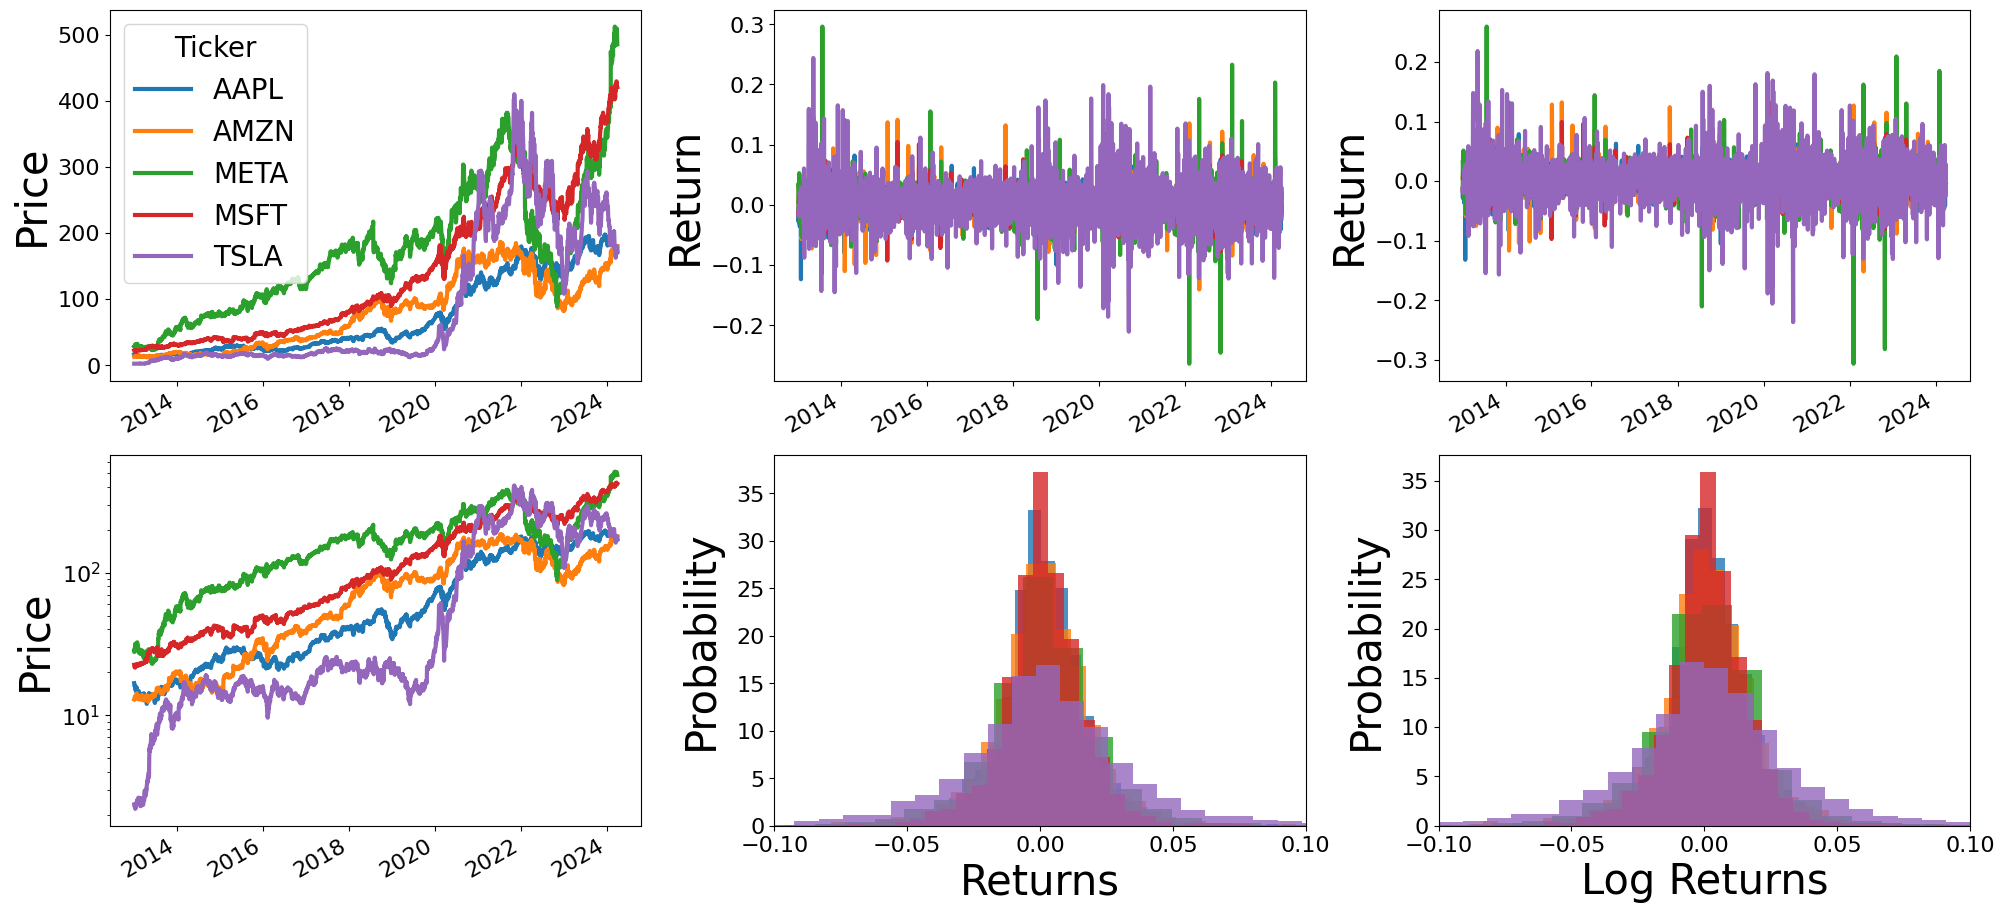

In [16]:
fig, ax = plt.subplot_mosaic("""ABC
DEF""", figsize=(8*3,6*2))

df_prices.plot(ax=ax["A"], lw=3, xlabel="", ylabel="Price")

df_returns.plot(ax=ax["B"], lw=3, xlabel="", ylabel="Return", legend=False)

df_log_returns.plot(ax=ax["C"], lw=3, xlabel="", ylabel="Return", legend=False)

df_prices.plot(ax=ax["D"], lw=3, xlabel="", ylabel="Price", legend=False)

ax["D"].set_yscale("log")

#Plot histogram of returns
for asset in df_prices.columns:
    df_returns[asset].hist(ax=ax["E"], bins=50, alpha=0.8, density=True, label=asset, legend=False, grid=False)

ax["E"].set_xlabel("Returns")
ax["E"].set_ylabel("Probability", labelpad=10)

ax["E"].set_xlim(-0.1, 0.1)

#Plot histogram of log_returns
for asset in df_prices.columns:
    df_log_returns[asset].hist(ax=ax["F"], bins=50, alpha=0.8, density=True, label=asset, legend=False, grid=False)

ax["F"].set_xlabel("Log Returns")
ax["F"].set_ylabel("Probability", labelpad=10)

ax["F"].set_xlim(-0.1, 0.1)

plt.subplots_adjust(wspace=0.25)

## Exercise 2

Complete the following google form about considering the plot above: https://forms.gle/FMp69oCLZsuHEYtE6

After completing the form, perform the following tasks:

* Compute the average return for each company and annualize it

* Compute the volatility (standar deviation, $\sigma$, of the return distribution) of each company and annualize it

* Compute the ratio of annualized returns to annualized volatilities

**Clue:** np.mean(x, axis) computes the mean of an array for the given axis and np.var(x, axis) computes the variance of an array for the given axis.

In [18]:
average_returns = df_log_returns.mean()*252

volatility = df_log_returns.std()*np.sqrt(252)

ratio = average_returns/volatility

df_results = pd.DataFrame({"Avg. Return":average_returns, "Volatility":volatility, "Sharpe Ratio":ratio})

df_results

,Avg. Return,Volatility,Sharpe Ratio
Ticker,,,
AAPL,0.207286,0.282907,0.732699
AMZN,0.235294,0.324616,0.724837
META,0.254335,0.386203,0.658551
MSFT,0.260821,0.267202,0.976120
TSLA,0.384216,0.564897,0.680153


After these results, which company would you say is the best performing one? Has your answer changed from previous one?

Later on the course we will see how to generalize this problem to perform Portfolio Optimization.

# Exercise 3: wrap-up

* Download the Adjusted Close price from 1st January 2000 to 31st December 2019 with daily resolution for the following companies:

  - McDonalds
  - Coca-Cola
  - Pfizer
  - S&P 500
  - IBEX 35
  - Bitcoin
  - Ethereum

**Note:** Use the prices in dollars except for the IBEX 35, which is in €. Don't worry about that, just go ahead.

* Plot the price evolution in both linear and logarithmic scale and the return distribution (**use log returns**)

* Compute the mean, variance and sharpe ratio for each asset and present it in a table.

In [22]:
# We select the start and end time for our data
start = datetime(2000, 1, 1)
end = datetime(2019, 12, 31)

interval = "1d" # We choose the frequency of the data

assets = ["MCD", "KO", "PFE", "^GSPC","^IBEX", "BTC-USD", "ETH-USD"] # Select the assets


df = yf.download(assets, start=start, end=end, interval=interval, progress=False) # Download the data

df_prices = df["Adj Close"] # Select "Adj Close" as the price of the assets

df_log_returns = price_change(df_prices, kind="log_return") # Compute log returns
df_returns = price_change(df_prices, kind="return") # Compute returns


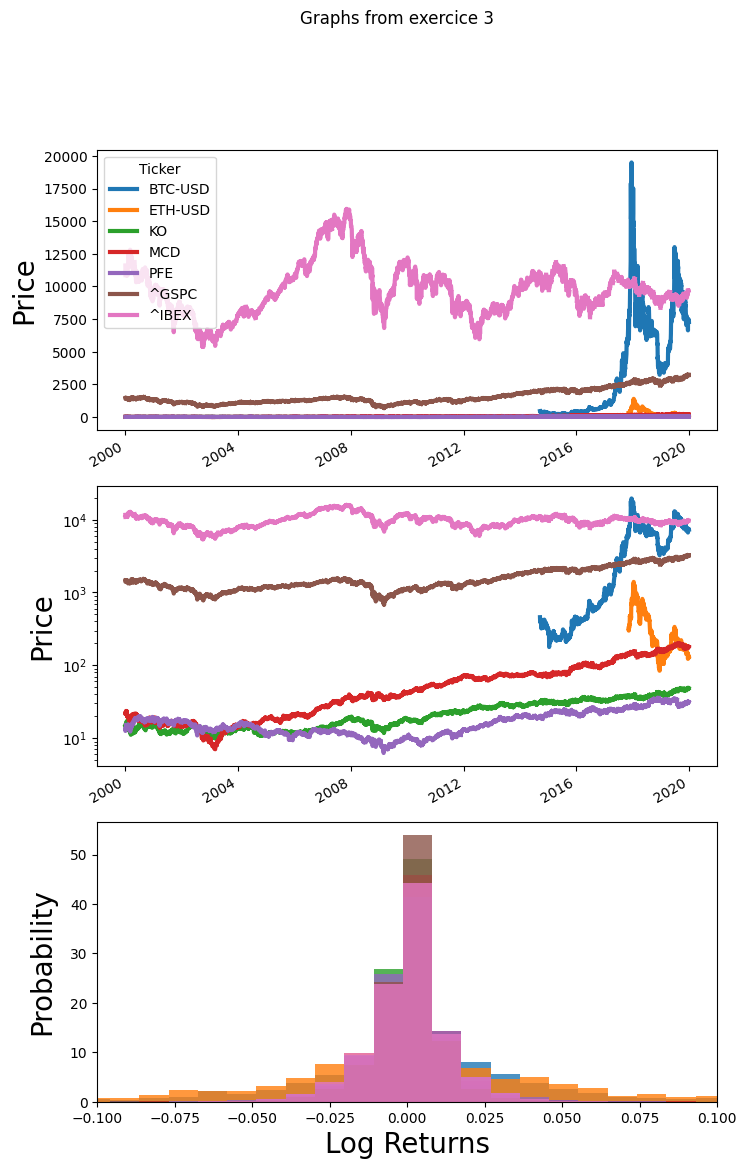

In [42]:
rcParams["font.size"] = 10 # I changed the fontsize so labels are not enormous

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,14)) # Define the subplot layout
fig.suptitle("Graphs from exercice 3")

# Plotting of the price
df_prices.plot(ax=ax[0],lw=3, xlabel="", ylabel="Price")

# Same plot but in logarithmic scale
df_prices.plot(ax=ax[1], lw=3, xlabel="", ylabel="Price", legend=False)
ax[1].set_yscale("log")

# Histogram of log returns
df_log_returns.plot.hist(ax=ax[2],bins=50, alpha=0.8, density=True, legend=False, grid=False)
ax[2].set_xlabel("Log Returns")
ax[2].set_ylabel("Probability", labelpad=10)

ax[2].set_xlim(-0.1, 0.1)

plt.show()

In [43]:
# we simply repeat the process of exercice 2
average_returns = df_log_returns.mean()*252

volatility = df_log_returns.std()*np.sqrt(252)

ratio = average_returns/volatility

df_results = pd.DataFrame({"Avg. Return":average_returns, "Volatility":volatility, "Sharpe Ratio":ratio})

df_results

,Avg. Return,Volatility,Sharpe Ratio
Ticker,,,
BTC-USD,0.361582,0.612740,0.590106
ETH-USD,-0.285070,0.810025,-0.351927
KO,0.053241,0.191027,0.278712
MCD,0.092308,0.213189,0.432985
PFE,0.038259,0.230451,0.166019
^GSPC,0.034971,0.177023,0.197553
^IBEX,-0.008309,0.215037,-0.038638
